## Biological Signals Analysis - Week 7 Exercise: Filters

- Comparing Finite Impulse Response (FIR) and Infinite Impulse Response (IIR) Filters
- Autoregressive Filter (Infinite Impulse Response, IIR)
- Finite Impulse Response (FIR) Filters
- Filter Examples
  - Butterworth Filter
  - Low Pass / High Pass
  - Band Pass / Band Reject

## Comparing Finite Impulse Response (FIR) and Infinite Impulse Response (IIR) Filters <a id="firvsiir"></a>

A Finite Impulse Response (FIR) filter is a filter with an impulse response of finite duration, as it decays to zero within a finite time period. This stands in contrast to Infinite Impulse Response (IIR) filters, which continue to respond indefinitely.

The primary distinction between these two types of impulse responses is their length: one is finite, and the other is infinite. However, it is essential to first comprehend what an impulse response is and its significance. An impulse response for a system represents its output when exposed to a brief input signal known as an impulse. An impulse is an extremely short pulse with an infinite amplitude, so brief that it occurs in zero time. The area beneath an impulse, which is the product of amplitude ($\infty$) and duration (zero), is defined as 1. This is commonly referred to as the unit delta function ($\delta$ function).

For a Linear Time-Invariant system with an input denoted as $x[n]$ and an output as $y[n]$, the output can be readily computed by convolving the input $x[n]$ with the system's transfer function, denoted as $h[n]$ in the time domain or $H[f]$ in the frequency domain.

  - **Terminology - Transfer Function**: The transfer function relates the Laplace transform of the system's output to the Laplace transform of the system's input. In other words, it quantifies how the system modifies the frequency content of the input signal to produce the output signal.

In other words:

$y[n] = x[n] \circledast h[n]$

&emsp; or:

$Y[f] = X[f] × H[f]$

If the system's input is a unit impulse, the output equals the transfer function. This represents the system's reaction to an impulse signal, hence it is termed the impulse response.

In the case of a finite impulse response, $h[n]$ possesses finite length, whereas for an infinite impulse response, $h[n]$ has infinite length. Consequently, implementing an FIR filter is generally accomplished by maintaining a shift-buffer of the input and directly computing the convolution. On the other hand, an IIR filter is typically computed as a combination of the current input and past N outputs. For instance:

$y[n] = x[n] + 0.8y[n-1]$

This represents a straightforward IIR filter that progressively attenuates the signal by 20% with each sample. The response is infinite because the signal will never reach zero.


#### Finite Impulse Response (FIR) Filters

FIR filters produce an output that only depends on the current and a finite number of previous input values.

  $
  y[n] = \sum_{k=0}^{M-1} b_k \cdot x[n-k]
  $
  
  where $ y[n] $ is the output, $ x[n] $ is the input, $ b_k $ are the filter coefficients, and $ M $ is the order of the filter.



#### Infinite Impulse Response (IIR) Filters

IIR filters produce an output that depends on the current and previous input values as well as previous output values. In other words, IIR filters contain **recursion**. The result not only depends on past inputs (the first term in the below expression is simply the FIR expression), but also a weighted combination of the past outputs.

  $
  y[n] = \sum_{k=0}^{M-1} b_k \cdot x[n-k] - \sum_{k=1}^{N} a_k \cdot y[n-k]
  $

  where $ a_k $ are the feedback coefficients and $ N $ is the order of the feedback part of the filter.

----------------------

#### Key Differences

1. **Impulse Response Duration**:
   - FIR: Has a finite duration, determined by the number of coefficients $ M $.
   - IIR: Theoretically infinite duration due to feedback; a single input can affect the output indefinitely.

2. **Stability**:
   - FIR: Inherently stable since the output does not depend on previous outputs.
   - IIR: Can be unstable if not properly designed, especially due to the feedback component.

3. **Phase Response**:
   - FIR: Can be easily designed to have a linear phase response, avoiding signal distortion.
   - IIR: Typically has a nonlinear phase response, which can cause signal distortion.

4. **Computational Complexity**:
   - FIR: Generally requires more computational resources for a comparable frequency response.
   - IIR: More computationally efficient due to feedback, but requires careful design to ensure stability.


## Autoregressive Filter (Infinite Impulse Response, IIR) <a id="iir"></a>

The autoregressive filter is a type of digital filter that operates on input signals to produce an output signal. Its primary characteristic is that the output is computed as a linear combination of the current and past input values as well as past output values. This recursive nature is why it's called "infinite impulse response" – theoretically, a single input impulse can affect the output indefinitely.

The general form of an autoregressive filter of order $p$ is given by:

$
y[n] = -\sum_{k=1}^{p} a_k \cdot y[n-k] + x[n]
$

Where:
- $y[n]$ is the output signal at time $n$,
- $x[n]$ is the input signal at time $ n $,
- $ a_k $ are the filter coefficients, and
- $ p $ is the order of the filter, determining how many past output values are used.

The negative sign in front of the summation indicates that the filter is typically implemented as a feedback system.


In neuroscience, autoregressive filters can be used for various purposes, such as:
- **Noise Reduction**: Reducing noise in neural recordings, thereby enhancing signal quality.
- **Feature Extraction**: Extracting features from neural signals for tasks like spike sorting or identifying specific neural patterns.
- **Signal Prediction**: Predicting future neural activity based on past data, which can be useful in brain-computer interfaces or understanding neural dynamics.


- **Stability**: Not all sets of coefficients $ a_k $ lead to a stable filter. Stability is typically ensured when the poles of the filter's transfer function are within the unit circle in the z-plane.
- **Design**: The design of the filter (choosing appropriate coefficients) is crucial and depends on the characteristics of the signal and the specific application in neuroscience.
- **Computational Efficiency**: Autoregressive filters are generally more computationally efficient than their non-recursive counterparts, making them suitable for real-time applications.


## Finite Impulse Response (FIR) Filters <a id='fir'></a>

Finite Impulse Response (FIR) filters are a class of digital filters that are critical in signal processing, particularly in the field of neuroscience. Unlike Infinite Impulse Response (IIR) filters, FIR filters have a finite duration of response to an input impulse, as their output is only dependent on current and past input values, not past output values. This characteristic makes FIR filters inherently stable and free from feedback loops.

### The Moving Average Filter - A Prime Example

A common example of an FIR filter is the Moving Average Filter, which is used to smooth data by averaging a set number of past input values. This is particularly useful in neuroscience for smoothing noisy neural data.

The Moving Average Filter can be mathematically expressed as:

$
y[n] = \frac{1}{M} \sum_{k=0}^{M-1} x[n-k]
$

Where:
- $ y[n] $ is the output signal at time $ n $,
- $ x[n] $ is the input signal at time $ n $,
- $ M $ is the number of points in the moving average, determining the length of the filter.

The output at each point $ n $ is the average of the last $ M $ input points, which smooths out rapid fluctuations in the input signal.

In neuroscience, the Moving Average Filter is particularly useful for:
- **Noise Reduction**: Smoothing out random noise in neural recordings.
- **Signal Preprocessing**: Preparing neural data for further analysis, such as feature extraction or spike detection.

- **Stability**: FIR filters are inherently stable, a desirable feature when dealing with sensitive neural data.
- **Linear Phase Response**: FIR filters can be designed to have a linear phase response, ensuring no phase distortion of the signal.
- **Flexibility in Design**: FIR filters can be tailored to specific requirements, such as specific frequency responses, making them versatile for various applications in neuroscience.

## Filters Examples

### Low-Pass and High-Pass Filters


Low-pass filters are designed to allow low-frequency signals to pass through while attenuating (reducing the amplitude of) high-frequency signals. They are commonly used in audio processing, signal processing, and in various electronic applications. The key characteristics of a low-pass filter include:

- **Cutoff Frequency:** This is the threshold frequency where the filter starts to attenuate higher frequency signals. Frequencies lower than the cutoff pass through with little or no attenuation. Mathematically, the cutoff frequency $ f_c $ is defined as the frequency at which the output signal's amplitude is reduced to $ \frac{1}{\sqrt{2}} $ (approximately 0.707) of the input signal's amplitude.

In contrast, high-pass filters allow high-frequency signals to pass through while attenuating low-frequency signals. They serve the opposite function of low-pass filters and are equally important in various domains.

- **Cutoff Frequency:** For high-pass filters, this is the frequency below which signals are attenuated. Frequencies higher than the cutoff pass through more freely. Mathematically, in a high-pass filter with a cutoff frequency $ f_c $, signals with frequencies lower than $ f_c $ are attenuated, while those with frequencies higher than $ f_c $ pass through with minimal attenuation.

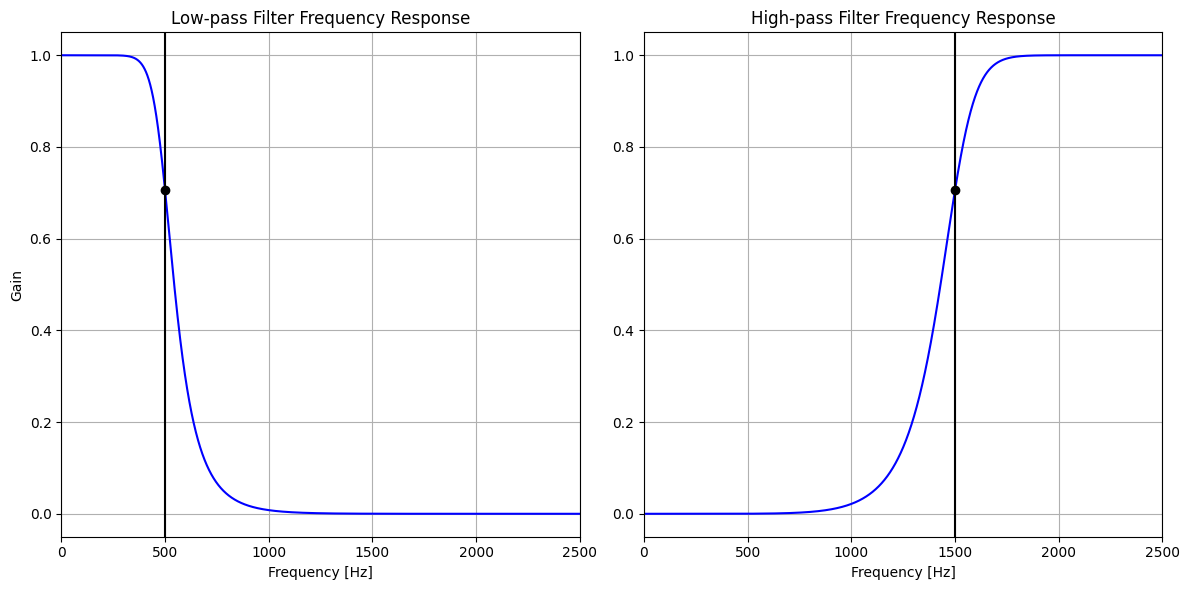

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

fs = 5000.0
low_cutoff = 500.0
high_cutoff = 1500.0

plt.figure(figsize=(12, 6))

b, a = butter_lowpass(low_cutoff, fs, order=6)
w, h = freqz(b, a, worN=8000)
plt.subplot(1, 2, 1)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.plot(low_cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(low_cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Low-pass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()

b, a = butter_highpass(high_cutoff, fs, order=6)
w, h = freqz(b, a, worN=8000)
plt.subplot(1, 2, 2)
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.plot(high_cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(high_cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("High-pass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

plt.tight_layout()
plt.show()


### Butterworth Filter

The Butterworth filter is a type of signal processing filter that is designed to have a frequency response that is as flat as possible in the passband. Named after British engineer Stephen Butterworth who first described it in 1930, the Butterworth filter is a popular choice in many applications due to its smooth response and straightforward design.

**A Butterworth filter is actually a type of low pass filter**


- **Maximally Flat Magnitude Response:** The Butterworth filter is designed to have the flattest possible magnitude response in the passband. This means there are no ripples in the frequency response in this region, providing a smooth and consistent output.

- **Pole-Zero Configuration:** The Butterworth filter can be characterized by its poles, which are located on a circle in the s-plane (complex frequency plane). The number of poles determines the order of the filter, with higher-order filters having more poles and therefore a steeper roll-off rate at the edge of the passband.

- **Roll-off Rate:** The Butterworth filter has a roll-off rate of 20n dB/decade, where n is the order of the filter. This means that the attenuation of frequencies outside the passband increases rapidly, providing effective signal filtering.

- **Phase Response:** The phase response of a Butterworth filter is non-linear, which can cause phase distortion in the filtered signal. However, the phase distortion is often a secondary concern compared to the amplitude response.

- **Applications:** Butterworth filters are widely used in audio processing, electronic instrumentations, and various control systems. They are suitable for applications where a smooth passband is more important than phase distortion.


The Butterworth filter is mathematically represented by its transfer function:

$ H(s) = \frac{G}{\sqrt{1 + (\frac{s}{\omega_c})^{2n}}} $

where:
- $ H(s) $ is the transfer function,
- $ G $ is the gain,
- $ \omega_c $ is the cutoff frequency,
- $ s $ is the complex frequency variable, and
- $ n $ is the order of the filter.

The design of a Butterworth filter involves choosing the appropriate order and cutoff frequency to achieve the desired balance between flatness in the passband and sharpness of the roll-off.

The following plot illustrates the frequency response of Butterworth filters of different orders. Each curve represents a Butterworth filter with a specific order, ranging from 1 to 6:

- The x-axis shows the frequency in Hertz (Hz).
- The y-axis represents the gain of the filter.

Key Observations:

1. **Flatness in the Passband:** Notice how each filter maintains a flat response in the passband (frequencies below the cutoff of 100 Hz). This is a hallmark of the Butterworth filter, providing a smooth and consistent output.

2. **Roll-off Rate:** As the order of the filter increases, the steepness of the roll-off at the edge of the passband also increases. Higher-order filters provide a sharper transition between the passband and the stopband.

3. **Attenuation of High Frequencies:** Frequencies above the cutoff are increasingly attenuated. Higher-order filters achieve greater attenuation at these frequencies.


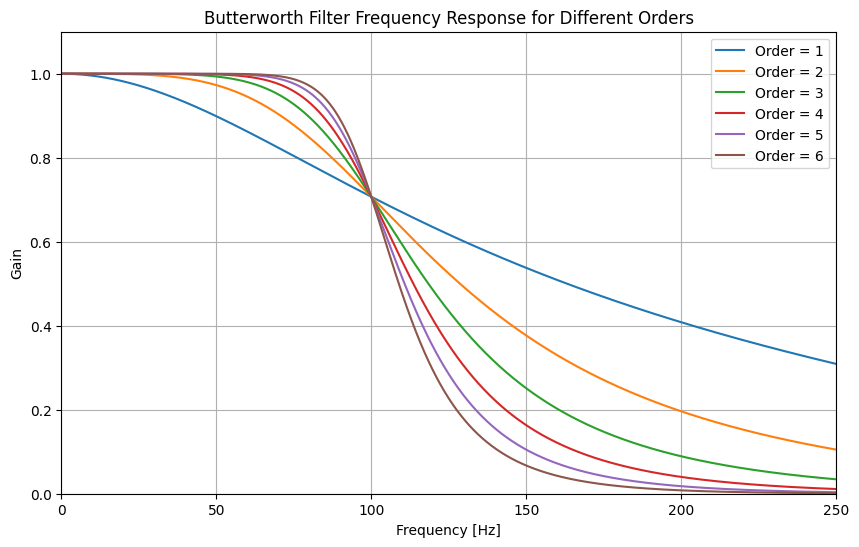

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

def plot_butterworth_filter(order, cutoff, fs):
    # Get the filter coefficients
    b, a = butter(order, cutoff / (0.5 * fs), btype='low')

    # Frequency response
    w, h = freqz(b, a, worN=8000)

    plt.plot(0.5 * fs * w / np.pi, np.abs(h), label=f"Order = {order}")

fs = 1000.0
cutoff = 100.0

plt.figure(figsize=(10, 6))
for order in [1, 2, 3, 4, 5, 6]:
    plot_butterworth_filter(order, cutoff, fs)

plt.title('Butterworth Filter Frequency Response for Different Orders')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.legend(loc='best')
plt.xlim(0, 250)
plt.ylim(0, 1.1)
plt.show()

### Band Pass and Band Reject Filters

#### Band-Pass Filters

Band-pass filters are designed to allow a specific range of frequencies to pass through while attenuating frequencies outside this range. They are essentially a combination of a low-pass filter and a high-pass filter, and are widely used in applications such as audio signal processing, radio communications, and instrumentations.

- **Passband:** The range of frequencies that the filter allows to pass through with minimal attenuation. Defined by a lower cutoff frequency ($ f_{c,low} $) and an upper cutoff frequency ($ f_{c,high} $).
- **Stopband:** Frequencies outside the passband are attenuated. This includes frequencies lower than $ f_{c,low} $ and higher than $ f_{c,high} $.
- **Bandwidth:** The width of the passband, typically defined as the difference between $ f_{c,high} $ and $ f_{c,low} $.
- **Applications:** Used in wireless transmitters and receivers to select desired frequency bands, audio equalization, and various signal processing tasks.

The transfer function of a band-pass filter can be represented as a combination of a low-pass and high-pass filter:

$ H(s) = \frac{G \cdot s^2}{(s^2 + s \frac{\omega_{c,low}}{Q} + \omega_{c,low}^2) \cdot (s^2 + s \frac{\omega_{c,high}}{Q} + \omega_{c,high}^2)} $

where:
- $ H(s) $ is the transfer function,
- $ G $ is the gain,
- $ \omega_{c,low} $ and $ \omega_{c,high} $ are the lower and upper cutoff frequencies,
- $ s $ is the complex frequency variable,
- $ Q $ is the quality factor, determining the selectivity of the filter.

#### Band-Reject Filters

Band-reject filters, also known as notch filters or band-stop filters, are designed to attenuate a specific range of frequencies while allowing frequencies outside this range to pass through. They are useful in applications where it is necessary to eliminate unwanted frequencies, such as noise or interference.

- **Stopband:** The range of frequencies that the filter attenuates. Defined by a lower cutoff frequency ($ f_{c,low} $) and an upper cutoff frequency ($ f_{c,high} $).
- **Passband:** Frequencies outside the stopband are passed through with minimal attenuation.
- **Bandwidth:** The width of the stopband, typically defined as the difference between $ f_{c,high} $ and $ f_{c,low} $.
- **Applications:** Used in audio processing to remove hums or noise, in telecommunications to filter out interference, and in scientific instruments to eliminate specific frequency components.

The transfer function of a band-reject filter is given by:

$ H(s) = \frac{(s^2 + s \frac{\omega_{c,low}}{Q} + \omega_{c,low}^2) \cdot (s^2 + s \frac{\omega_{c,high}}{Q} + \omega_{c,high}^2)}{G \cdot s^2} $

where:
- $ H(s) $ is the transfer function,
- $ G $ is the gain,
- $ \omega_{c,low} $ and $ \omega_{c,high} $ are the lower and upper cutoff frequencies,
- $ s $ is the complex frequency variable,
- $ Q $ is the quality factor.

These plots illustrate the frequency response of Band-Pass and Band-Reject filters of different orders:

**Band-Pass Filters (Top Plot):**
- These filters allow a specific range of frequencies (between 50 Hz and 150 Hz in this case) to pass through with minimal attenuation.
- As the order of the filter increases (from 1 to 3), the selectivity and sharpness of the passband become more pronounced.
- Frequencies outside the passband are attenuated.

**Band-Reject Filters (Bottom Plot):**
- Band-Reject filters attenuate a specific range of frequencies (between 50 Hz and 150 Hz in this case) while allowing frequencies outside this range to pass through.
- Similar to Band-Pass filters, as the order of the filter increases (from 1 to 3), the selectivity of the stopband improves.
- Frequencies within the stopband are attenuated.

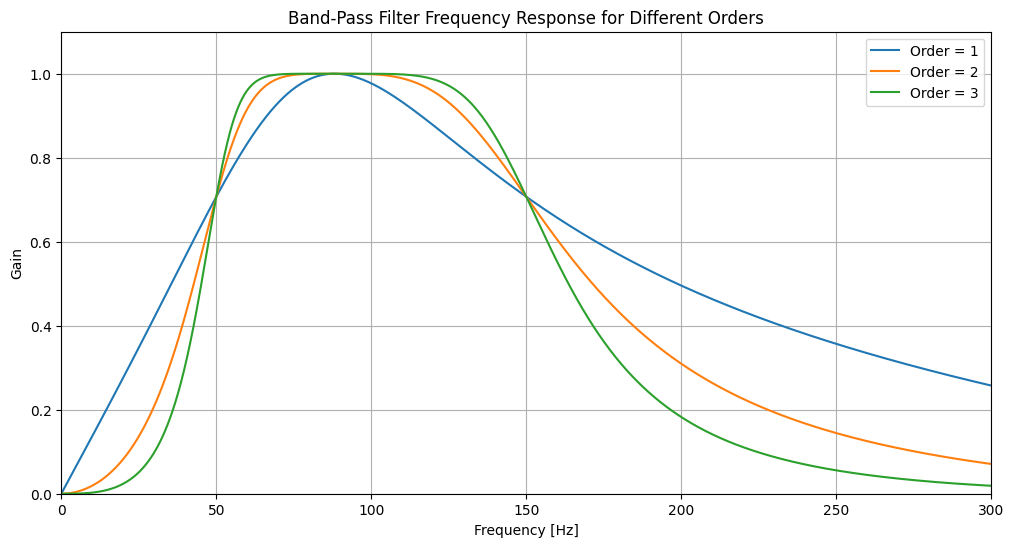

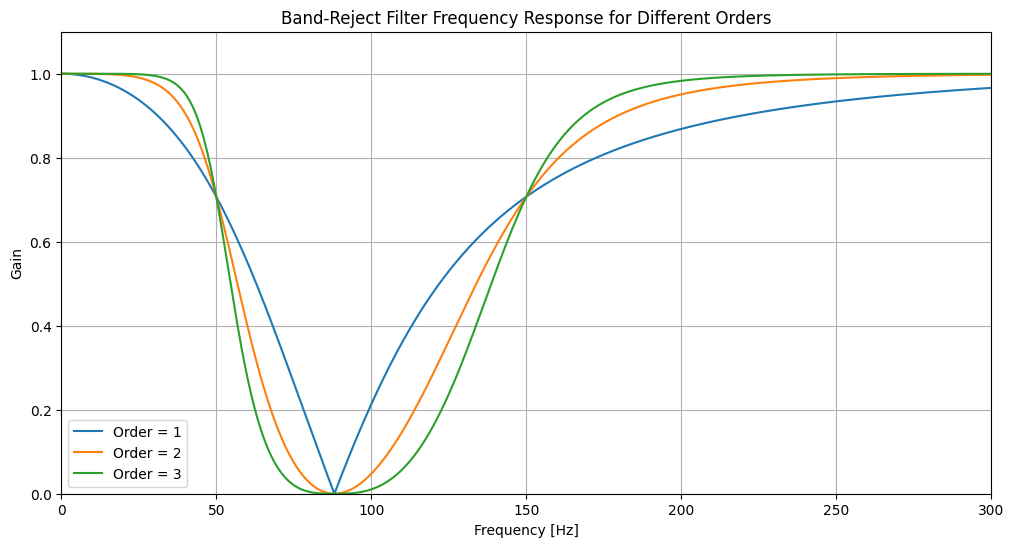

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

def plot_band_pass_filter(order, low_cutoff, high_cutoff, fs):
    b, a = butter(order, [low_cutoff / (0.5 * fs), high_cutoff / (0.5 * fs)], btype='band')
    w, h = freqz(b, a, worN=8000)
    plt.plot(0.5 * fs * w / np.pi, np.abs(h), label=f"Order = {order}")

fs = 1000.0
low_cutoff = 50.0
high_cutoff = 150.0

plt.figure(figsize=(12, 6))
for order in [1, 2, 3]:
    plot_band_pass_filter(order, low_cutoff, high_cutoff, fs)

plt.title('Band-Pass Filter Frequency Response for Different Orders')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.legend(loc='best')
plt.xlim(0, 300)
plt.ylim(0, 1.1)
plt.show()

def plot_band_reject_filter(order, low_cutoff, high_cutoff, fs):
    b, a = butter(order, [low_cutoff / (0.5 * fs), high_cutoff / (0.5 * fs)], btype='bandstop')
    w, h = freqz(b, a, worN=8000)
    plt.plot(0.5 * fs * w / np.pi, np.abs(h), label=f"Order = {order}")

low_cutoff_br = 50.0
high_cutoff_br = 150.0

plt.figure(figsize=(12, 6))
for order in [1, 2, 3]:
    plot_band_reject_filter(order, low_cutoff_br, high_cutoff_br, fs)

plt.title('Band-Reject Filter Frequency Response for Different Orders')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.legend(loc='best')
plt.xlim(0, 300)
plt.ylim(0, 1.1)
plt.show()

## Putting it all together: EEG Data Example

### Filtering a noisy EEG signal with a Butterworth filter 

Common practice in EEG analysis, aimed at improving the quality of the signal for better interpretation and analysis.

#### Why?

1. **Noise Reduction**: EEG signals are often contaminated with various types of noise, such as environmental noise, electrical interference, or physiological artifacts (like muscle movements or eye blinks). A Butterworth filter can effectively reduce this noise, particularly high-frequency components, while preserving the integrity of the EEG signal.

2. **Avoiding Signal Distortion**: The smooth, flat response of the Butterworth filter in the passband is particularly advantageous in EEG analysis, as it avoids distorting the amplitude and phase of the EEG signals, ensuring that the physiological information remains intact.

3. **Improving Signal Clarity**: By filtering out frequencies that are not of interest or are known to be noise, the Butterworth filter enhances the clarity of the EEG signal, making it easier to identify and analyze neurological events and patterns.

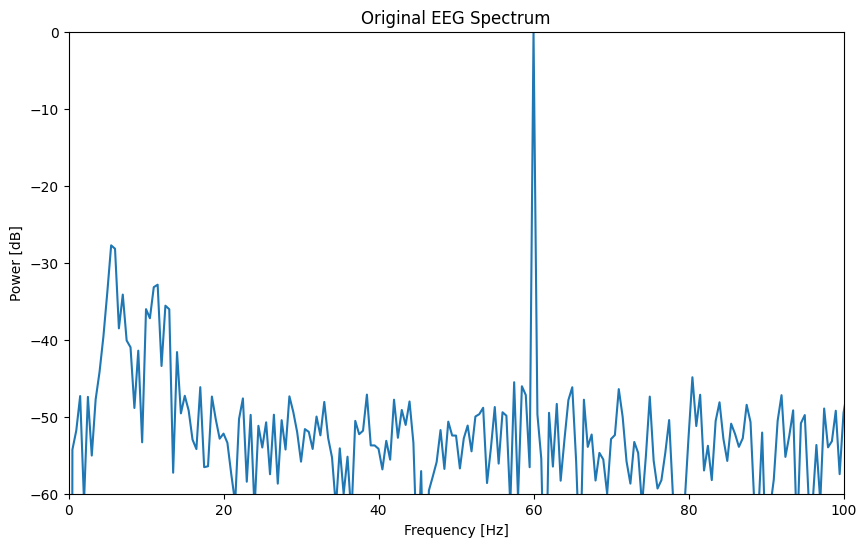

In [18]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

data = loadmat('EEG-Signal.mat')
EEG = data['EEG'][:, 0]  # Extract the EEG variable
t = data['t'][0]         # Extract the time variable

dt = t[1] - t[0]
N = len(EEG)
T = N * dt 
f_s = 1 / dt

EEG_transformed = np.fft.rfft(EEG)
faxis = np.fft.rfftfreq(N, dt)
spectrum = (2 * dt ** 2 / T * EEG_transformed * EEG_transformed.conj()).real

plt.figure(figsize=(10, 6))
plt.plot(faxis, 10 * np.log10(spectrum / max(spectrum)))  
plt.xlim([0, 100])  # Setting the frequency range
plt.ylim([-60, 0])  # Setting the decibel range
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [dB]')
plt.title('Original EEG Spectrum')
plt.show()

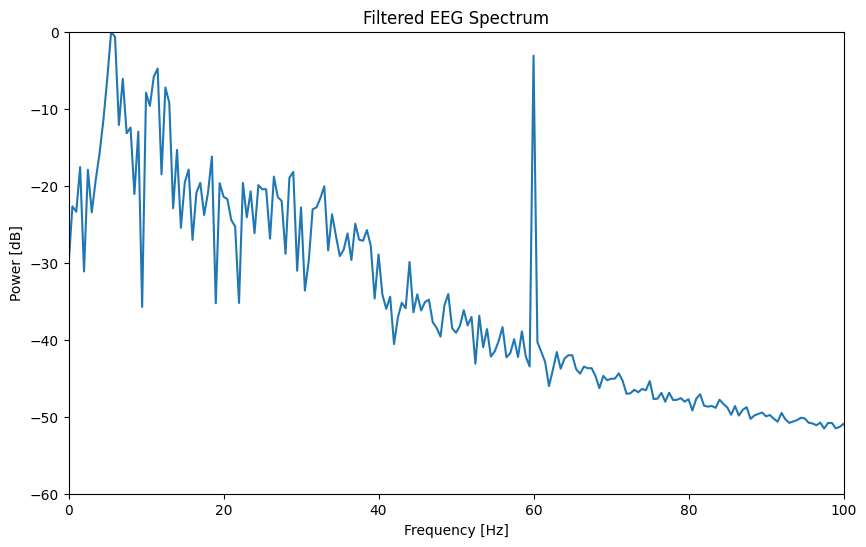

In [19]:
# Butterworth Low-pass Filter for Noise Reduction
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Applying the Butterworth filter to the EEG signal
cutoff_frequency = 30  # 30 Hz
EEG_filtered = butter_lowpass_filter(EEG, cutoff_frequency, f_s)

EEG_transformed = np.fft.rfft(EEG_filtered)
faxis = np.fft.rfftfreq(N, dt)
spectrum = (2 * dt ** 2 / T * EEG_transformed * EEG_transformed.conj()).real

plt.figure(figsize=(10, 6))
plt.plot(faxis, 10 * np.log10(spectrum / max(spectrum)))  
plt.xlim([0, 100])  # Setting the frequency range
plt.ylim([-60, 0])  # Setting the decibel range
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [dB]')
plt.title('Filtered EEG Spectrum')
plt.show()

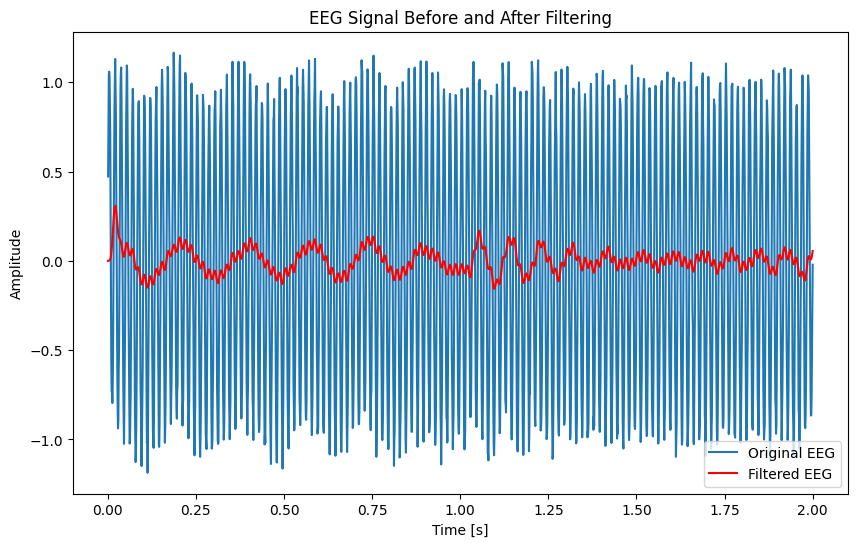

In [20]:
# Plotting the filtered EEG signal
plt.figure(figsize=(10, 6))
plt.plot(t, EEG, label='Original EEG')
plt.plot(t, EEG_filtered, label='Filtered EEG', color='red')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('EEG Signal Before and After Filtering')
plt.legend()
plt.show()

### Convolving a matched filter with a noisy EEG signal to detect an Event-Related Potential (ERP)

1. **Creating a Template**: An ERP template is designed based on a known or expected waveform. This template represents the signal of interest – the ERP – which is typically a distinctive waveform pattern in response to a stimulus.

2. **Simulating a Noisy EEG Signal**: A noisy measured EEG signal is recorded. Within this noisy signal, we want to detect the ERP.

3. **Matched Filter Convolution**: The noisy EEG signal is convolved with the ERP template.

4. **Identifying the ERP**: Peaks in the convolution output signal indicate the positions where the ERP is most likely to have occurred in the noisy EEG signal.

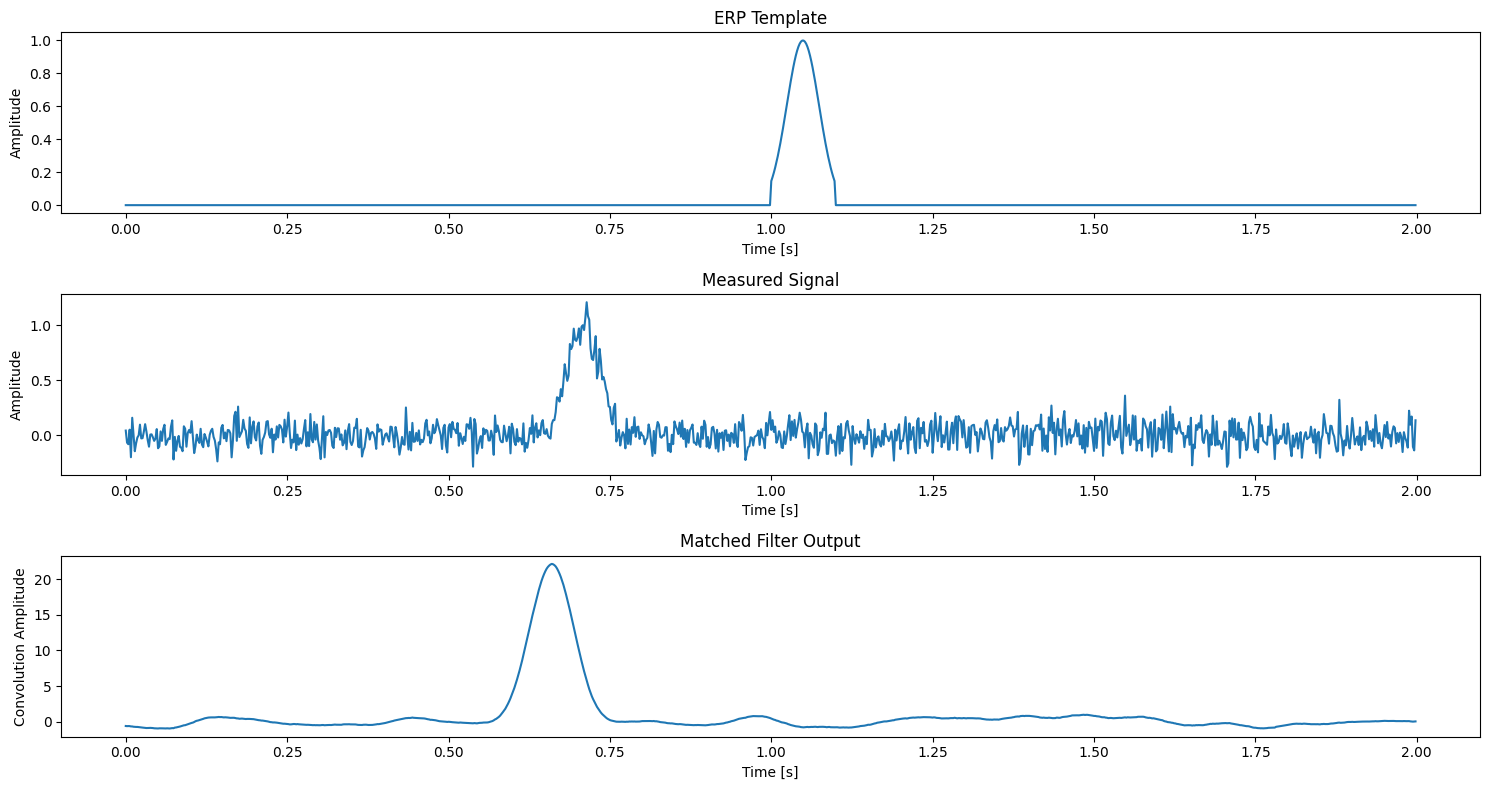

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Generating two fake EEG signals
fs = 500  # Sampling frequency (Hz)
t = np.arange(0, 2, 1/fs)  # Time vector (2 seconds)
n = len(t)

# Generate a template signal for a known event-related potential (ERP)
erp_duration = 0.1  # Duration of the ERP in seconds
erp_samples = int(erp_duration * fs)
erp_template = np.zeros(n)
midpoint = n // 2
erp_template[midpoint:midpoint + erp_samples] = signal.windows.gaussian(erp_samples, std=erp_samples/4)

measured_signal = np.random.normal(0, 0.1, n)  # Baseline noise
insert_point = np.random.randint(0, n - erp_samples)
measured_signal[insert_point:insert_point + erp_samples] += signal.windows.gaussian(erp_samples, std=erp_samples/4)

# Matched Filter Convolution
matched_filter_output = convolve(measured_signal, erp_template[::-1], mode='same')

plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(t, erp_template)
plt.title('ERP Template')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.subplot(3, 1, 2)
plt.plot(t, measured_signal)
plt.title('Measured Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.subplot(3, 1, 3)
plt.plot(t, matched_filter_output)
plt.title('Matched Filter Output')
plt.xlabel('Time [s]')
plt.ylabel('Convolution Amplitude')
plt.tight_layout()
plt.show()